In [1]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [2]:
df_1 = pd.read_csv('./files/mubarak2017twitter/mubarak2017ar_twitter.csv',sep='\t')

In [3]:
df_1.dropna(inplace=True)

In [4]:
df_1['labels'].unique()

array(["['none']", "['offensive']", "['obscene']"], dtype=object)

In [5]:
is_toxic= (df_1['labels']!= "['none']").astype(int)

In [6]:
new_df_1 = pd.concat([df_1['text'],is_toxic],axis=1)

In [10]:
df_2 = pd.read_csv('./files/mulki2019/mulki2019ar.csv', sep='\t')
df_2

,id,text,labels
0,0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,['abusive']
1,1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,['none']
2,2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,['none']
3,3,وليد جنبلاط كاتب الحكمة يا قذر,['abusive']
4,4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,['abusive']
...,...,...,...
5841,5841,أمير المليشيا مش خائن,['none']
5842,5842,صدقت يناسبك جدا جدا,['none']
5843,5843,لبخليني حب باسيل شغلتين,['none']
5844,5844,ليش تيوس الإمارت والسعودية مع السوريين واليمني...,['hate']


In [12]:
is_toxic= (df_2['labels']!= "['none']").astype(int)

In [13]:
new_df_2 = pd.concat([df_2['text'],is_toxic],axis=1)

In [14]:
new_df = pd.concat([new_df_1,new_df_2],axis=0)

In [15]:
new_df

,text,labels
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,1
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,1
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,1
...,...,...
5841,أمير المليشيا مش خائن,0
5842,صدقت يناسبك جدا جدا,0
5843,لبخليني حب باسيل شغلتين,0
5844,ليش تيوس الإمارت والسعودية مع السوريين واليمني...,1


In [16]:
df_4 = pd.read_csv('./files/mubarak2017aljazeera/mubarak2017ar_aljazeera.csv',sep='\t')

In [17]:
is_toxic= (df_4['labels']!= "['none']").astype(int)

In [18]:
new_df_4 = pd.concat([df_4['text'],is_toxic],axis=1)

In [19]:
df = pd.concat([new_df,new_df_4],axis=0)

In [20]:
df.sample(30)

,text,labels
4687,حافظ يا روحك يلعن اليوم العالمي للاعسر,1
3263,جاسوس برتبة وزير,0
30518,قال تعالى : وقال نوح رب لا تذر على الأرض من ال...,1
1148,ههههههههههههه الله يهديك,0
5603,الحمد لله و اخيراً قبض على الإرهابي الجبان لبن...,1
17962,تماما مثل الأب الروحي المافيوسي يقتل رفاق العص...,1
10515,كما قالها صدام لحكامكم اجلس ياقزم انتم أمام ال...,1
10607,نصيحتي الى الجزيرة حافظي على مكانتكي في قلوب ا...,1
24670,فعلا حتى حثالة الأرض يحاربون المسلمين,1
16528,عجيب !! ..عشرات الآلاف من القتلى من الأبرياء ا...,0


## after merging

In [119]:
import numpy as np
from sklearn.model_selection import train_test_split

In [120]:
X = df['text']
y = df['labels']

In [121]:
y = y.values
list_sentences_train = X

In [122]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)

In [123]:
list_tokenized_train

[[547, 2, 8538, 832, 112, 12812, 112, 5065, 6, 9544, 6, 4, 10961],
 [911, 5065, 1795, 4, 145, 12813],
 [449, 9, 20, 2398, 5065, 686, 4728],
 [2564, 22, 375, 5437],
 [1882, 279, 112, 1, 496, 1937, 19513, 212, 10962, 239, 398, 533],
 [158, 2565, 25],
 [116,
  647,
  524,
  20,
  9,
  52,
  686,
  87,
  3,
  15449,
  648,
  686,
  315,
  52,
  8,
  3266,
  3990],
 [857, 75, 968, 2171, 969, 5856, 1169, 112, 3, 15450, 350, 186, 375],
 [20, 4209],
 [911, 5065, 1795, 4, 145, 12813],
 [51, 10963, 105, 10964, 75, 3607, 7658, 9545],
 [1108, 176, 2, 250, 19514, 1, 7, 3991, 341, 672],
 [1452, 1017, 2470, 30, 2665, 60, 4210, 15451, 6],
 [3267, 55, 19515, 1169, 19516, 442, 3, 881],
 [87, 3, 1250, 25, 20, 75, 9546, 2100, 19517],
 [66, 68, 1744, 289, 3992, 1108, 2, 19518],
 [2046, 943, 524, 12814, 17, 9547, 278, 23, 249, 6350, 4],
 [254,
  1087,
  6909,
  6910,
  1087,
  19519,
  15452,
  1109,
  1087,
  1796,
  9548,
  1087,
  15453,
  15454,
  112,
  9549,
  5857],
 [1088,
  19520,
  308,
  6,
  128

In [171]:
maxlen = 13 # choosed by the avg
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)

In [172]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

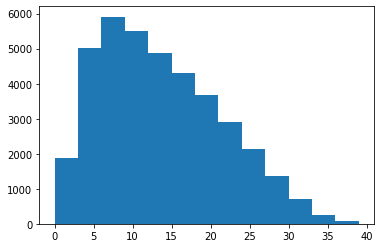

In [173]:
plt.hist(totalNumWords,bins = np.arange(0,40,3))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [196]:
inp = Input(shape=(maxlen, ))

In [197]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [198]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [199]:
x = GlobalMaxPool1D()(x)

In [200]:
x = Dropout(0.1)(x)

In [201]:
x = Dense(50, activation="relu")(x)

In [202]:
x = Dropout(0.1)(x)

In [203]:
x = Dense(1, activation="sigmoid")(x)

In [204]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [205]:
batch_size = 64
epochs = 1
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

544/544 [==============================] - 28s 46ms/step - loss: 0.4818 - accuracy: 0.7823 - val_loss: 0.3964 - val_accuracy: 0.8349


In [215]:
import pickle

model.save('arabic_model.h5',save_format='h5')


# saving
with open('arabic_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [217]:
from keras.models import load_model
model_2 = load_model('arabic_model.h5')

# loading
with open('arabic_tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [221]:
text = ''

text_token = tokenizer.texts_to_sequences([text])
maxlen = 13 # choosed by the avg
text_token_pad = pad_sequences(text_token, maxlen=maxlen)

model_2.predict(text_token_pad)

1/1 [==============================] - 0s 97ms/step


array([[0.7605729]], dtype=float32)

### thing to consider

- more data, more accuracy
- removing stop words